# Text data Analysis

## Process

1. 텍스트 데이터를 str 자료형으로 준비 

2. Tokenize(형태소 분석)

3. POS Tagging (Part-of-speech, 품사표시)

4. Stopwords 제거 (불용어 제거)

5. 단어 갯수 카운팅 & 단어 사전 생성

6. 단어 사전 기반 데이터 시각화 => 머신러닝/딥러닝 모델 적용

In [24]:
import nltk # national language toolkit
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import re # regular expression

In [25]:
sentence = 'NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.'

tokens = nltk.word_tokenize(sentence) #토크나이징 처리 
nltk.pos_tag(tokens) # 품사를 태깅
stopWords = stopwords.words('english') # 불용어 모음

stopWords.append('.')
stopWords.append(',')
stopWords.append('\'')
stopWords.append('\"')
stopWords.append('_')
stopWords.append('else')
stopWords.append('$')

In [15]:
result = []
for token in tokens:
    if token.lower() not in stopWords:
        result.append(token)

In [14]:
lemmatizer = nltk.wordnet.WordNetLemmatizer() # 단어의 사전 형태로 복원 ex) cats => cat

In [15]:
print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("geese"))

cat
goose


In [38]:
file = open('moviereview.txt', 'r', encoding='utf-8')
lines = file.readlines()

sentnce = lines[1]

tokens_temp = nltk.word_tokenize(sentnce)
tokens = []

for token in tokens:
        if token.lower() not in stopWords:
            tokens.append(token)
            
tag_tokens = nltk.pos_tag(tokens)
lemmas = []

for token, pos in tag_tokens:
    if pos.startswith('N'):
        lemmas.append(lemmatizer.lemmatize(token.lower()))
    elif pos.startswith('J'):
        lemmas.append(lemmatizer.lemmatize(token.lower(), pos= 'a'))
    elif pos.startswith('V'):
        lemmas.append(lemmatizer.lemmatize(token.lower(), pos= 'v'))
    else:
        lemmas.append(lemmatizer.lemmatize(token.lower()))

In [26]:
file = open('darkknight.txt', 'r', encoding= 'utf-8')
lines = file.readlines()

In [22]:
tokens = []

for line in lines:
    tokenized = nltk.word_tokenize(line)
    for token in tokenized:
        if token.lower() not in stopWords:
            tokens.append(token)
tags = nltk.pos_tag(tokens)

In [17]:
word_list = []
word_list_a = []
word_list_v = []
for word, pos in tags:
    if pos in ['NN', 'NNS', 'NNP', 'NNPS']:
        word_list.append(word.lower())
    elif pos.startswith('J'):
        word_list_a.append(word.lower())
    elif pos.startswith('V'):
        word_list_v.append(word.lower())

In [18]:
counts = Counter(word_list)
counts_a = Counter(word_list_a)
counts_v = Counter(word_list_v)

In [19]:
print(counts.most_common(5))
print(counts_a.most_common(5))
print(counts_v.most_common(5))

[('movie', 406), ('batman', 303), ('film', 284), ('joker', 219), ('dark', 136)]
[('good', 141), ('best', 102), ('great', 78), ('many', 54), ('much', 52)]
[('see', 59), ('get', 54), ('made', 49), ('think', 46), ('seen', 45)]


In [23]:
corpus = nltk.Text(tokens)
corpus

<Text: 've subjected enormous amount hype marketing Dark Knight...>

In [27]:
tokens = []
for line in lines:
    tokenized = nltk.word_tokenize(line)
    for token in tokenized:
        if token.lower() not in stopWords:
            if re.match('^[a-zA-Z]+',token): # 대괄호 안에 있는 문자로 시작하는 것 + => 하나 혹은 그이상, * => 0개 혹은 그이상, ? => 하나 혹은 0개
                tokens.append(token)

In [28]:
corpus = nltk.Text(tokens)

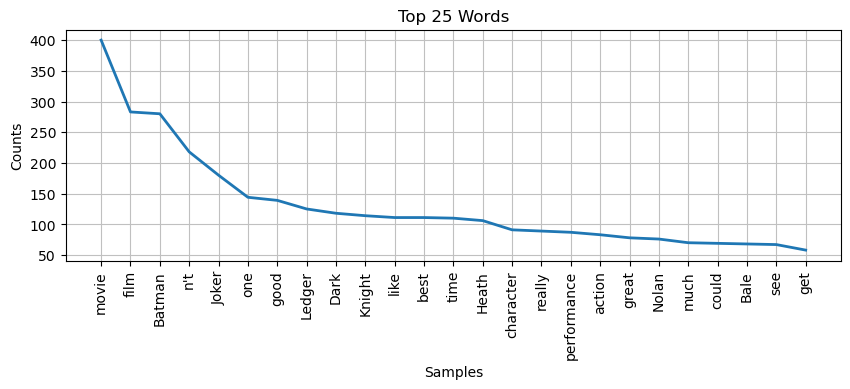

<Axes: title={'center': 'Top 25 Words'}, xlabel='Samples', ylabel='Counts'>

In [33]:
plt.figure(figsize=(10, 3))
plt.title('Top 25 Words')
corpus.plot(25)